In [1]:
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

C:\Users\HughJ\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# tf.gfile.Glob 查找匹配pattern的文件并以列表的形式返回，filename可以是一个具体的文件名，也可以是包含通配符的正则表达式
# 加载TFRecord文件，用tf.train.string_input_producer生成一个解析队列
#filename_queue = tf.train.string_input_producer(tf.gfile.Glob("pj_vehicle_validation_00002-of-00004.tfrecord"),shuffle=True)
filename_queue = tf.train.string_input_producer(tf.gfile.Glob("pj_vehicle_train_00000-of-00004.tfrecord"),shuffle=True)
reader = tf.TFRecordReader()
_,serialized_example = reader.read(filename_queue) #返回文件名和文件

In [3]:
features = tf.parse_single_example(serialized_example,
                                   features={
                                       'image/encoded':tf.FixedLenFeature([],tf.string),
                                       'image/format':tf.FixedLenFeature([],tf.string),
                                       'image/class/label':tf.FixedLenFeature([],tf.int64),
                                       'image/height': tf.FixedLenFeature([],tf.int64),
                                       'image/width': tf.FixedLenFeature([],tf.int64),   
                                   })

tfrecord_image = tf.image.decode_jpeg(features['image/encoded'],channels=3)
tfrecord_width = tf.cast(features['image/width'],tf.int32)
tfrecord_height = tf.cast(features['image/height'],tf.int32)
tfrecord_label = tf.cast(features['image/class/label'],tf.int32)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


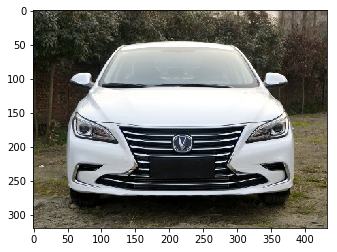

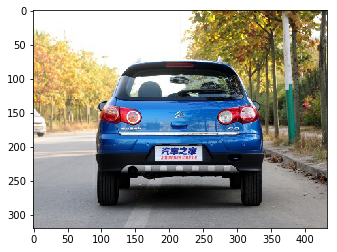

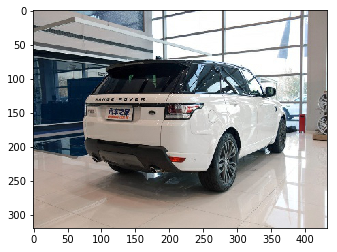

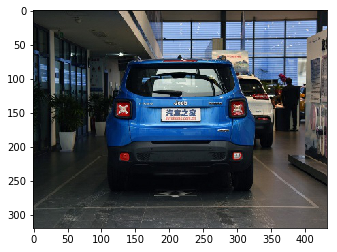

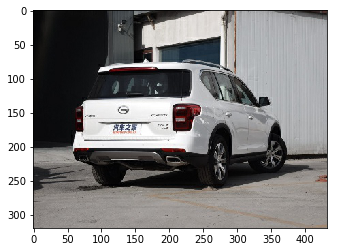

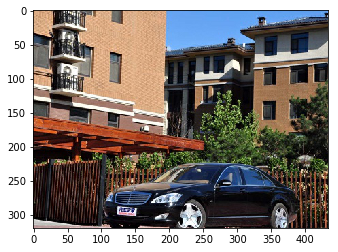

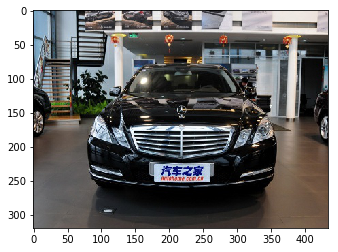

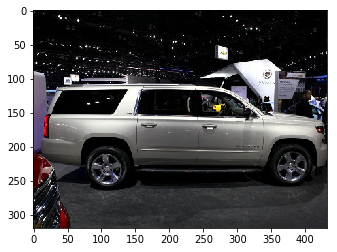

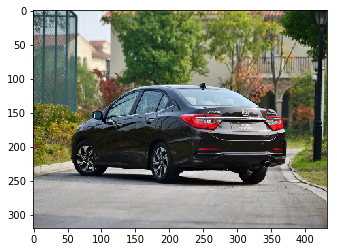

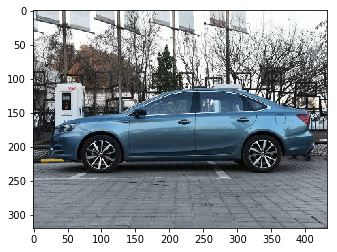

In [4]:
# 运行程序
with tf.Session() as sess:                   # 开始一个会话
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    # 启动多线程
    coord = tf.train.Coordinator()   # 创建一个协调器，管理线程
    threads = tf.train.start_queue_runners(coord=coord)  #启动QueueRunner，此时文件名队列已经进队
    
    for i in range(10):
        plt.imshow(tfrecord_image.eval())
        plt.show()
        example,lab,width,height = sess.run([tfrecord_image,tfrecord_width,tfrecord_height,tfrecord_label])
        img = Image.fromarray(example, 'RGB')
        img.save('img'+str(i)+'_'+str(width)+'x'+str(height)+'_label_'+str(lab)+'.jpg')   #保存图片
        
    coord.request_stop()
    coord.join(threads)
              